# Filtragem Digital 2

Esta atividade consiste em projetar diferentes filtros passa-faixa e filtrar o sinal

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [28]:
from pylab import *
from scipy import signal

1) Considere o sinal x, a soma de 3 senoides.

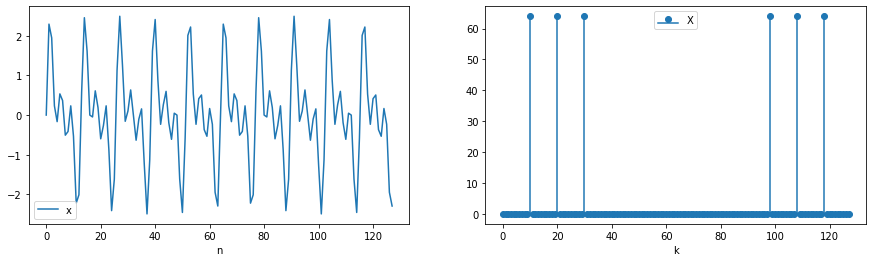

In [3]:
N=128
n=arange(N)
x1=sin(10*2*pi*n/N)
x2=sin(20*2*pi*n/N)
x3=sin(30*2*pi*n/N)
x=x1 + x2 + x3

figure(figsize=(15,4))
subplot(1,2,1)
plot(x,label='x')
legend()
xlabel('n')
subplot(1,2,2)
stem(abs(fft(x)),basefmt='C0', label='X')
legend()
xlabel('k')
show()

2) Projete um filtro FIR de ordem 9 para deixar passar somente a senoide central, usando a função signal.firwin().

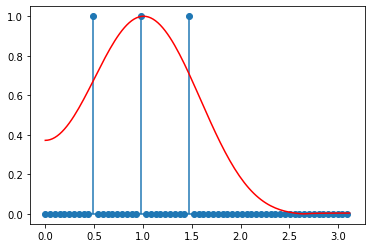

In [13]:
filtroFIR = signal.firwin(11, [0.5, 1.5], pass_zero=False, nyq=pi)
wFIR, HFIR = signal.freqz(filtroFIR, 1, N)
X = fft(x)
abX = abs(X)/max(abs(X))
n1 = linspace(0, pi, 64, endpoint=False)
stem(n1, abX[:64],basefmt='C0', label='X')
plot(wFIR, abs(HFIR), 'r')

3) Projete um filtro IIR de ordem 9, semelhante ao anterior, usando a função signal.butter()


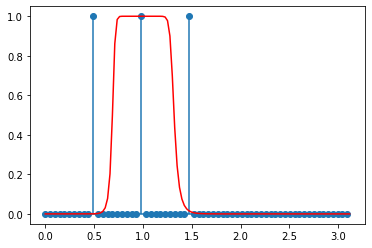

In [14]:
b, a = signal.butter(10, [0.7, 1.3], btype='bandpass', fs=2*pi)
wIIR, HIIR = signal.freqz(b, a, N)

stem(n1, abX[:64],basefmt='C0', label='X')
plot(wIIR, abs(HIIR), 'r')

4) Plote o espectro do sinal X juntamente com as respostas em frequência dos dois filtros.


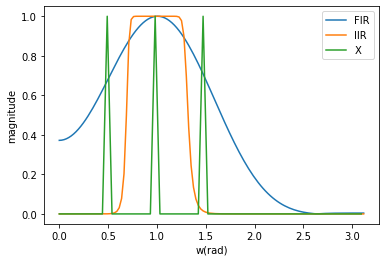

In [17]:
plot(wFIR, abs(HFIR), label='FIR')
plot(wIIR, abs(HIIR), label='IIR')
plot(n1, abX[:64], label='X')
xlabel('w(rad)')
ylabel('magnitude')
legend()

5) Filtre o sinal pelos com cada filtro, e plote no mesmo eixo os dois sinais filtrados.


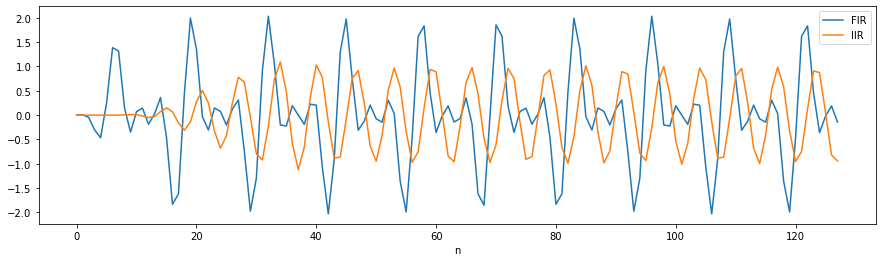

In [21]:
xFIR = signal.lfilter(filtroFIR, 1, x)
xIIR = signal.lfilter(b, a, x)

figure(figsize=(15,4))
plot(xFIR, label='FIR')
plot(xIIR, label='IIR')
xlabel('n')
legend()

6) qual dos dois filtros rejeitou melhor as frequencias baixa e alta ?


O filtro IIR rejeitou melhor as duas frequências laterais, deixando passar a frequência central. O filtro FIR tem uma banda mais larga e permitiu passar as frequências laterais com um ganho relativamente alto.

7) Plote no mesmo eixo a resposta em frequencia dos filtro FIR obtida de duas formas:<br>
a) freqz() <br>
b) T.F. da resposta ao impulso. (obs.: lembre que os proprios coeficiente do filtro são a resposta ao impulso. Pode completar a resposta com mais 60 zeros).

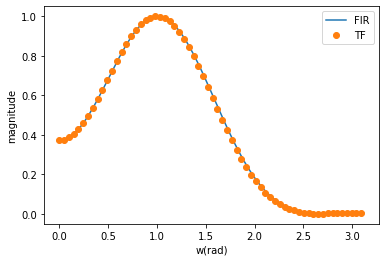

In [27]:
d = concatenate((ones(1), zeros(126)))
hd = signal.lfilter(filtroFIR, 1, d)
HD = fft(hd)

plot(wFIR, abs(HFIR), label='FIR')
plot(n1, abs(HD[:64]), 'o', label='TF')
xlabel('w(rad)')
ylabel('magnitude')
legend()